In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# Step 1: Load the dataset
from google.colab import files
uploaded = files.upload()



Saving social_media_trends.csv to social_media_trends.csv


In [13]:
df = pd.read_csv('social_media_trends.csv')
print(df.head())

    Hashtag  Platform Post_Type  Engagement        Date
0   #Sports   Twitter     Image        1419  2024-07-28
1   #Movies    TikTok      Text        1110  2024-08-26
2  #Fitness  Facebook      Reel         827  2024-04-16
3   #Travel    TikTok     Video         608  2024-12-28
4     #Food  LinkedIn      Text        1973  2024-08-21


In [14]:
# Convert Date to proper datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the data
df = df.sort_values(by='Date')

# Check unique platforms
print(df['Platform'].unique())


['Twitter' 'Instagram' 'TikTok' 'Facebook' 'LinkedIn']


In [20]:
# Show basic info
print("\nDataframe Info:")
print(df.info())


Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 33 to 3
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Hashtag     100 non-null    object        
 1   Platform    100 non-null    object        
 2   Post_Type   100 non-null    object        
 3   Engagement  100 non-null    int64         
 4   Date        100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 4.7+ KB
None


In [21]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Hashtag       0
Platform      0
Post_Type     0
Engagement    0
Date          0
dtype: int64


In [23]:
# Drop duplicates
df_cleaned = df.drop_duplicates()

# Drop rows with any nulls
df_cleaned = df_cleaned.dropna()

In [24]:
# Show cleaned data shape
print(f"\nData shape after cleaning: {df_cleaned.shape}")


Data shape after cleaning: (100, 5)


In [25]:
# For example, if you have a 'topic' column:
if 'topic' in df_cleaned.columns:
    print("\nTop 10 trending topics:")
    print(df_cleaned['topic'].value_counts().head(10))

In [26]:
# Save cleaned data for later use
df_cleaned.to_csv("cleaned_social_media_trends.csv", index=False)
print("\nCleaned data saved to 'cleaned_social_media_trends.csv'")


Cleaned data saved to 'cleaned_social_media_trends.csv'


In [27]:
# Parse date
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])


In [28]:
# Check engagement column type
print(df['Engagement'].describe())

count     100.000000
mean     2275.060000
std      1350.623154
min        60.000000
25%      1094.750000
50%      2020.500000
75%      3384.750000
max      4915.000000
Name: Engagement, dtype: float64


In [29]:
# If Engagement looks like string numbers, convert to numeric
df['Engagement'] = pd.to_numeric(df['Engagement'], errors='coerce')
df = df.dropna(subset=['Engagement'])

In [30]:
# Trend of average engagement over time
daily_engagement = df.groupby(df['Date'].dt.date)['Engagement'].mean()

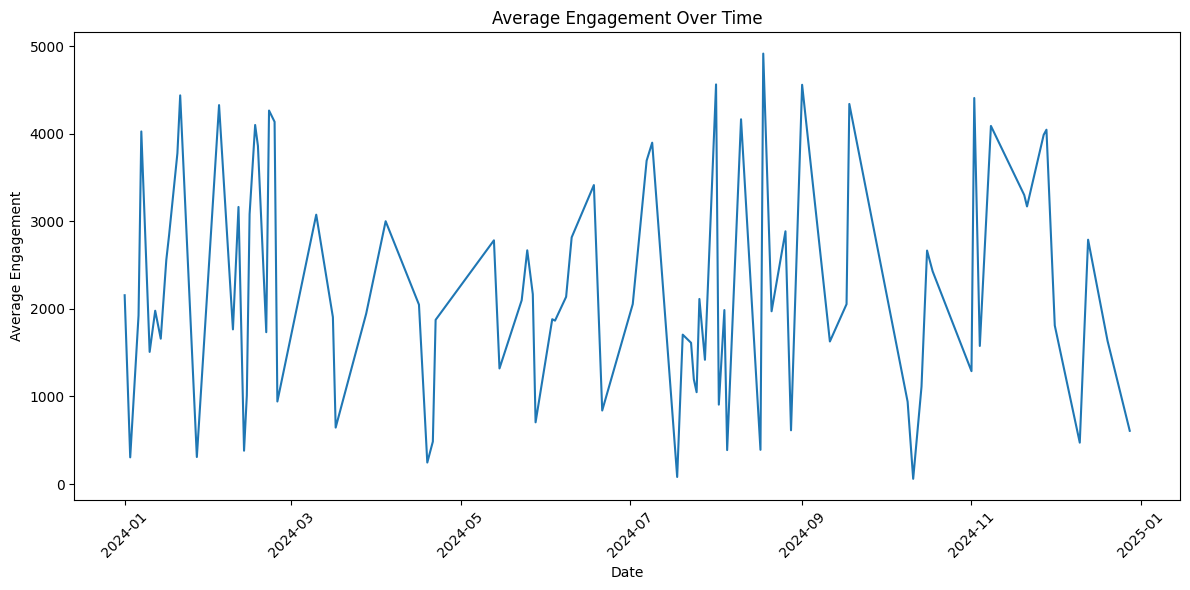

In [31]:
plt.figure(figsize=(12,6))
daily_engagement.plot()
plt.title("Average Engagement Over Time")
plt.xlabel("Date")
plt.ylabel("Average Engagement")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
# Top 10 hashtags by average engagement
top_hashtags = df.groupby('Hashtag')['Engagement'].mean().sort_values(ascending=False).head(10)


/tmp/ipython-input-33-2188791106.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hashtags.index, y=top_hashtags.values, palette='viridis')


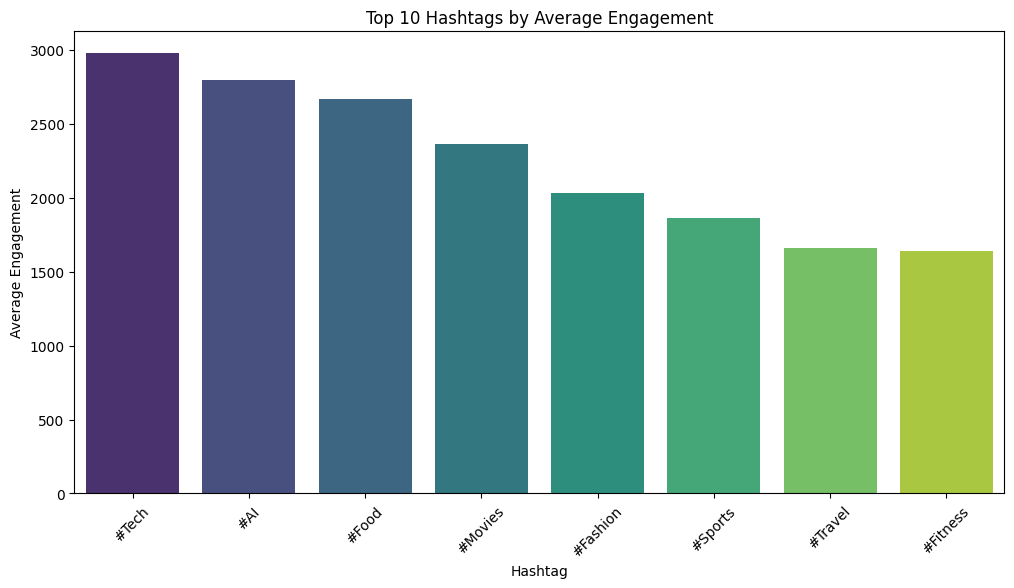

In [33]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_hashtags.index, y=top_hashtags.values, palette='viridis')
plt.title("Top 10 Hashtags by Average Engagement")
plt.ylabel("Average Engagement")
plt.xticks(rotation=45)
plt.show()

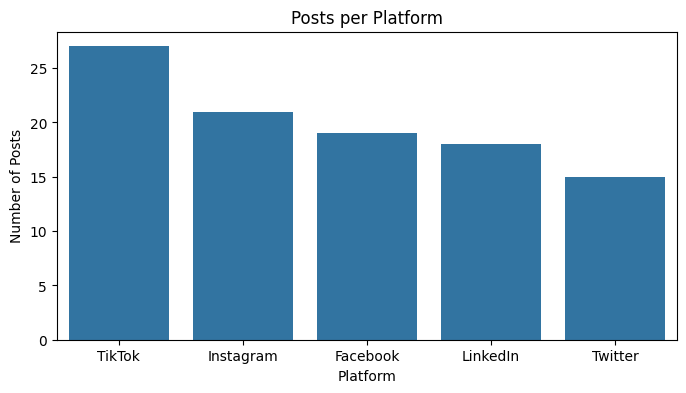

In [34]:
# Platform distribution
platform_counts = df['Platform'].value_counts()
plt.figure(figsize=(8,4))
sns.barplot(x=platform_counts.index, y=platform_counts.values)
plt.title("Posts per Platform")
plt.ylabel("Number of Posts")
plt.show()

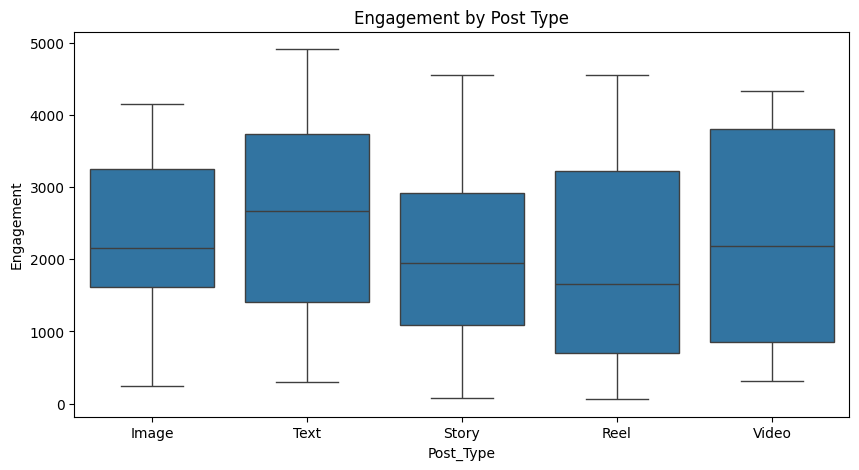

In [35]:
# Engagement by Post_Type
plt.figure(figsize=(10,5))
sns.boxplot(x='Post_Type', y='Engagement', data=df)
plt.title("Engagement by Post Type")
plt.show()

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [37]:
# Example: Predict engagement based on Platform, Post_Type, Hashtag (encoded)
X = pd.get_dummies(df[['Platform', 'Post_Type', 'Hashtag']], drop_first=True)
y = df['Engagement']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
# Evaluate
print(f"Model R2 score: {model.score(X_test, y_test):.2f}")

Model R2 score: -0.50


In [42]:
# Create time-based features
df['weekday'] = df['Date'].dt.weekday
df['month'] = df['Date'].dt.month

# Encode categoricals
X = pd.get_dummies(df[['Hashtag', 'Platform', 'Post_Type', 'weekday', 'month']], drop_first=True)
y = df['Engagement']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

RMSE: 1575.75
R^2: -0.40


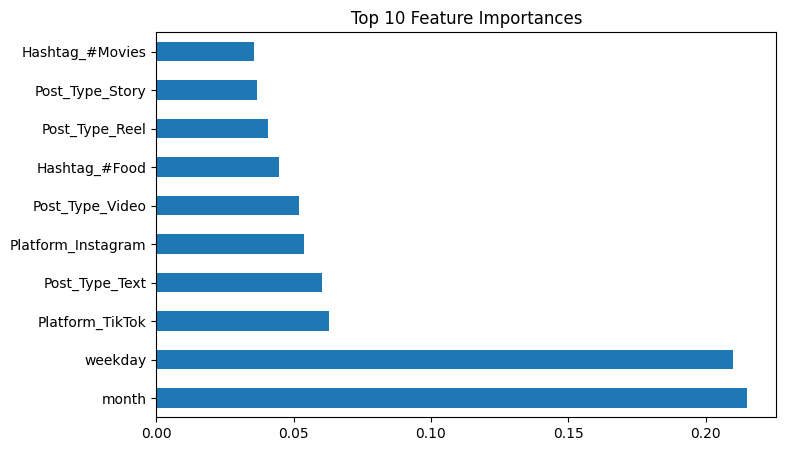

In [44]:
# Predict
y_pred = model.predict(X_test)

# Evaluate
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")

# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10).plot(kind='barh', figsize=(8,5))
plt.title("Top 10 Feature Importances")
plt.show()